In [1]:
import numpy as np
import pandas as pd
import h5py
import os
import healpy as hp
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 18) 
mpl.rc('ytick', labelsize = 18)

In [3]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [4]:
color1 = '#121f1f'
color2 = '#eba75f'
mycmap = LinearSegmentedColormap.from_list("my_cmap", [color1, color2])

In [5]:
user = 'ulyanadupletsa'
PATH_TO_MAPS = '/Users/' + str(user) + '/Documents/Radio-Sirens/maps/'

In [48]:
nside=128
npix=hp.nside2npix(nside)

In [58]:
count_data = np.loadtxt(PATH_TO_MAPS + 'count_maps/' + 'count_map_snapshot61_zmin0.02_zmax0.05_nside128.txt')
mean_count_per_pix= np.sum(count_data)/npix
count_map = (count_data - mean_count_per_pix)/mean_count_per_pix

In [59]:
prob_map = np.zeros(npix, dtype=float) 
prob_map = count_data - np.min(count_data)
prob_map = prob_map/np.sum(prob_map)

In [72]:
# randomly draw N GW samples accordingly to this probaility density map
np.random.seed(1) #fixing the seed to make result reproducible
N_gws = 500
list_pix = np.random.choice(np.arange(npix), N_gws, p=prob_map)

In [73]:
# create GW map using the selected pixels
event_map = np.zeros(npix)
event_map[list_pix] = 1.

In [74]:
# RA-DEC location of the events
theta,phi = hp.pix2ang(nside,list_pix)
ra = phi/np.pi*180.
dec = theta/np.pi*180. -90.

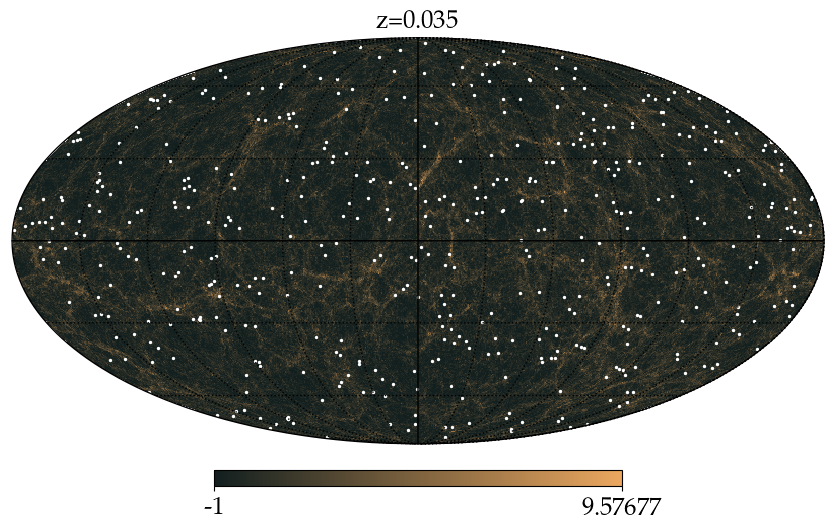

In [75]:
#visualisation of event location
hp.mollview(count_map,cmap=mycmap,  title='z=0.035')
# Adjust title font size using graticule
hp.graticule(verbose=False)  # Ensures grid is added
plt.title('z=0.035', fontsize=18)  # Adjust font size
hp.projscatter(ra, dec, lonlat=True, color='white', s=2)
plt.savefig('plots/gws_on_hydro_map.pdf', bbox_inches='tight')
plt.show()